In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
names = ['sale', 'lease', 'bid_amount', 'company_num', 'precentage_bid']
bids = pd.read_csv('data/BID.txt', sep='\s+', names=names)
bids['lease']=bids['lease'].str[1:].astype(int)
bids.head()

,sale,lease,bid_amount,company_num,precentage_bid
0,252,36477,275408,3197,100.0
1,252,36478,801988,689,100.0
2,252,36479,801988,689,100.0
3,252,36480,801988,689,100.0
4,252,36481,801988,689,100.0


In [12]:
companies = pd.read_csv('data/Company2.TXT', usecols=[0], header=None)
companies['company_num']=companies[0].str[:6].astype(int)
companies['company']=companies[0].str[6:]
companies = companies.drop([0], axis=1)
companies.head()

,company_num,company
0,59,Hess Corporation
1,78,Chevron U.S.A. Inc.
2,689,Shell Offshore Inc.
3,730,Walter Oil & Gas Corporation
4,1284,W & T Offshore


In [69]:
pnames = ['lease', 'protraction_id', 'block_num', 'acreage', 'size', 'percentage', 'rcode', 'term', 'number_bids']
prebid = pd.read_csv('data/PREBID.txt', sep='\s+', names=pnames, index_col=None)
prebid.head()

,lease,protraction_id,block_num,acreage,size,percentage,rcode,term,number_bids
0,36647,NG15-03,420,5760000,18,3/4%,R22,7,1
1,36673,NG16-01,68,5760000,18,3/4%,R23,10,1
2,36631,NG15-03,92,5760000,18,3/4%,RS21,5,1
3,36687,NG16-02,414,5760000,18,3/4%,R23,10,1
4,36689,NG15-05,779,5760000,18,3/4%,R23,10,1


## Merge

In [70]:
dfa = pd.merge(bids, companies, on=['company_num', 'company_num'])
dfa.head()

,sale,lease,bid_amount,company_num,precentage_bid,company
0,252,36477,275408,3197,100.0,GOME 1271 LLC
1,252,36511,125311,3197,100.0,GOME 1271 LLC
2,252,36512,150721,3197,100.0,GOME 1271 LLC
3,252,36513,225424,3197,100.0,GOME 1271 LLC
4,252,36478,801988,689,100.0,Shell Offshore Inc.


In [72]:
prebid_small = prebid[['lease', 'protraction_id', 'block_num']]

In [76]:
dfb = pd.merge(prebid_small, dfa)
dfb['block_code']=dfb.protraction_id+' - '+dfb.block_num
dfb.head()

,lease,protraction_id,block_num,sale,bid_amount,company_num,precentage_bid,company,block_code
0,36647,NG15-03,420,252,589909,59,100.0,Hess Corporation,NG15-03 - 420
1,36673,NG16-01,68,252,605524,2481,100.0,BP Exploration & Production Inc.,NG16-01 - 68
2,36631,NG15-03,92,252,300000,1284,100.0,W & T Offshore,NG15-03 - 92
3,36687,NG16-02,414,252,771988,689,100.0,Shell Offshore Inc.,NG16-02 - 414
4,36689,NG15-05,779,252,750000,2058,100.0,LLOG Exploration Offshore,NG15-05 - 779


In [64]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [78]:
G = nx.from_pandas_edgelist(dfb, 'block_code', 'company')
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 257
Number of edges: 285
Average degree:   2.2179


C:\Users\Nathan.Suurmeyer\AppData\Local\Continuum\anaconda3\envs\pyvize\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


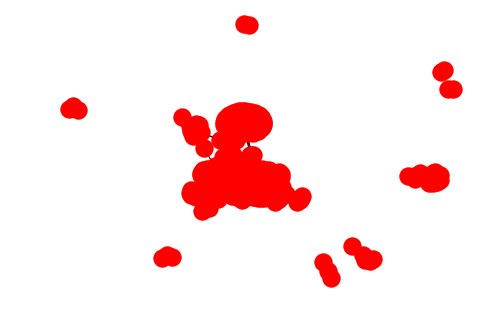

In [79]:
nx.draw(G)